In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers



In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.', untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [4]:
import pathlib
data_dir=pathlib.Path('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

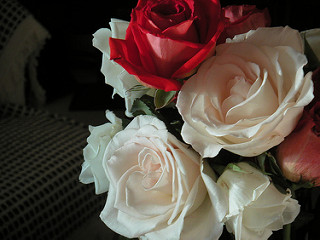

In [7]:
import PIL.Image


PIL.Image.open(str(roses[1]))


In [8]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),


}

In [9]:
flower_labels_dict={
'roses':0,
'daisy':1,
'dandelion':2,
'sunflowers':3,
'tulips':4

}

In [10]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [11]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X,y=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])


In [18]:
X=np.array(X)
y=np.array(y)


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [26]:
from keras.models import Sequential



In [27]:
num_classes=5
model=Sequential([
    #CNN
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(326,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #Dense
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation='softmax')# 5neurons

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']         )

In [49]:
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.3320 - loss: 1.5963
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.5188 - loss: 1.2050
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5647 - loss: 1.0882
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6230 - loss: 0.9615
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7158 - loss: 0.7752


In [34]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\RIDHIMA GUPTA\Desktop\MLAI\env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


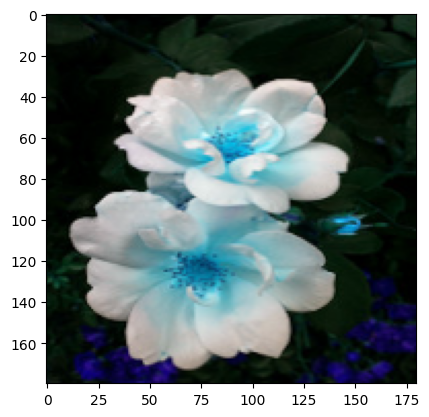

In [35]:
plt.imshow(X[0])

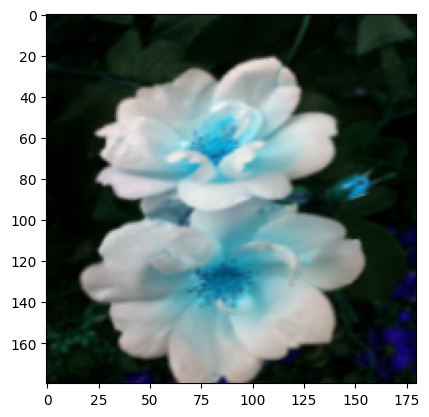

In [36]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [37]:
num_classes=5
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)  

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 61s 533ms/step - accuracy: 0.2658 - loss: 1.6971
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 394ms/step - accuracy: 0.5370 - loss: 1.1139
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 546ms/step - accuracy: 0.6127 - loss: 1.0140
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 427ms/step - accuracy: 0.6416 - loss: 0.9168
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - accuracy: 0.6416 - loss: 0.9008



You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 90.08%